## Lab 5 - PID control
Run this cell before running any other cells

In [144]:
%reload_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

ble = get_ble_controller()
ble.connect()

2025-02-27 16:57:32,981 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:ec:f2:c2:23:04
2025-02-27 16:57:35,945 | INFO     |: Connected to c0:ec:f2:c2:23:04


In [145]:
# Notification Handler
def notification_handler(uuid, byte_array):
    global time_list, dist, pid, pwm, p, i, d
    rx_string = ble.bytearray_to_string(byte_array)
#    print(rx_string)
    if rx_string.find(',') < 0:
        print(rx_string)
    else:
        time, a, b, c, kp, ki, kd = rx_string.split(',')
        time_sec = float(time[2:])/1000
        time_list.append(time_sec)
        dist.append(float(a[3:]))
        pid.append(float(b[3:]))
        pwm.append(float(c[3:]))
        p.append(float(kp[3:]))
        i.append(float(ki[3:]))
        d.append(float(kd[3:]))
        
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [146]:
ble.send_command(CMD.GET_TIME_MILLIS, "")

T:38354


In [147]:
ble.send_command(CMD.SEND_THREE_FLOATS, "1234567890|9876543|0.034567")

In [148]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

In [149]:
# Ku = 0.15-0.2
# Pu = 0.4 sec
# 
# Kp = 0.6 * Ku = .12
# Ki = 2 * Kp / Pu = 0.6
# Kd = Kp * Pu / 8 = 0.006
ble.send_command(CMD.SET_PID_MAX, "1.0|0.00|0.00|50|50|600|1.2")

KP:1.000 KI:0.000 KD:0.000 PID_MAX:50 DEADZONE:50 WALL_DIST:600.000 CORRECTION:1.200


In [150]:
ble.send_command(CMD.GO_WALL, "")

KP:1.000 KI:0.000 KD:0.000 PID_MAX:50 DEADZONE:50 CORRECTION:1.200 WALL_DIST:600.000
  Finished Go Wall


In [151]:
# Clear the data
time_list = []
dist = []
pid = []
pwm = []
p = []
i = []
d = []

# send the command
ble.send_command(CMD.GET_WALL_DATA, "")

  Sending PID data ...
  Data sent!


676


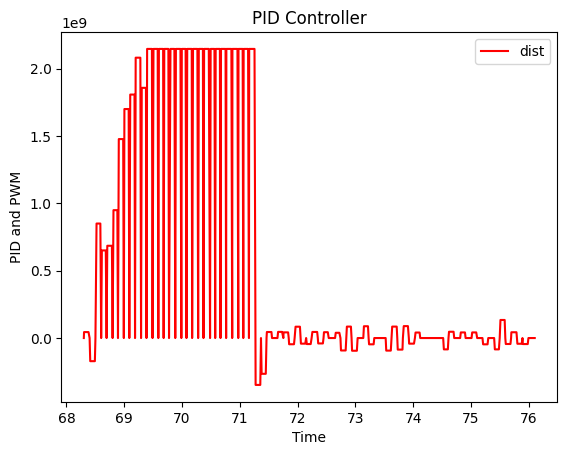

2025-02-27 16:59:44,089 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E


In [153]:
#plt.yticks([-180, -120, -60, 0, 60, 120, 180])
count = len(time_list)
print(count)
    
#for i in range(0, 500):
#    print(time_list[i], dist[i], pid[i], pwm[i])

total = count - 1

plt.plot(time_list[:total], dist[:total], color='r', label='dist')
#plt.plot(time_list[10:total],  pid[10:total], color='g', label='pid')
#plt.plot(time_list[10:total],  pwm[10:total], color='b', label='pwm')
#plt.plot(time_list[:total],  p[:total],   color='c', label='P')
#plt.plot(time_list[:total],  i[:total],  color='m', label='I')
#plt.plot(time_list[:total],  d[:total],  color='y', label='D')

plt.title('PID Controller')
plt.xlabel('Time')
plt.ylabel('PID and PWM')
plt.legend()
plt.show()

In [ ]:
# Forward 1 seconds. max speed, then brake hard
ble.send_command(CMD.SET_PWM, "100|0|100|0|1000")
ble.send_command(CMD.SET_PWM, "255|255|255|255|1000")

In [26]:
# Right motor only
ble.send_command(CMD.SET_PWM, "0|0|50|0|2000")

In [27]:
# Left motor only
ble.send_command(CMD.SET_PWM, "50|0|0|0|2000")

In [28]:
# rotate CCW
ble.send_command(CMD.SET_PWM, "1|250|250|1|2000")

In [29]:
# rotate CW
ble.send_command(CMD.SET_PWM, "250|1|1|250|2000")

In [135]:
# Forward 2 seconds
ble.send_command(CMD.SET_PWM, "40|3300")

In [139]:
# Backward 2 seconds
ble.send_command(CMD.SET_PWM, "-40|3500")

In [62]:
# stop
ble.send_command(CMD.SET_PWM, "0|0|0|0|0")

In [33]:
# slowest forward
ble.send_command(CMD.SET_PWM, "40|00|40|00|2000")

In [34]:
# slowest reverse
ble.send_command(CMD.SET_PWM, "00|80|00|80|2000")

In [35]:
# slowest turn
ble.send_command(CMD.SET_PWM, "00|80|80|0|2000")

## Disconnect

In [36]:
# Disconnect
ble.disconnect()

2025-02-26 14:10:02,313 | INFO     |: Disconnected from E8E0F7A4-7773-8749-3CAD-EADBED93F90E
